<a href="https://colab.research.google.com/github/julioe27/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
plt.style.use('fast')

In [4]:
plt.style.available

['seaborn-pastel',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-deep',
 'ggplot',
 'bmh',
 'seaborn-muted',
 'seaborn-talk',
 'seaborn-white',
 'seaborn',
 'seaborn-ticks',
 'seaborn-colorblind',
 'fast',
 'seaborn-notebook',
 'Solarize_Light2',
 'tableau-colorblind10',
 'fivethirtyeight',
 'seaborn-poster',
 'classic',
 'seaborn-bright',
 'seaborn-paper',
 'seaborn-dark',
 'grayscale',
 '_classic_test',
 'seaborn-darkgrid',
 'seaborn-whitegrid']

In [5]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [8]:
df['cabin_class'] = df['Pclass'].map({1:'first', 2:'second',3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


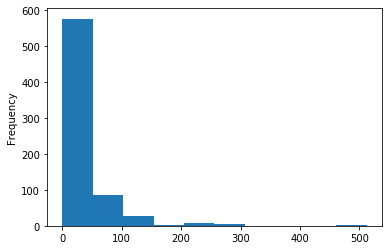

In [9]:
df['Fare'].plot(kind='hist');

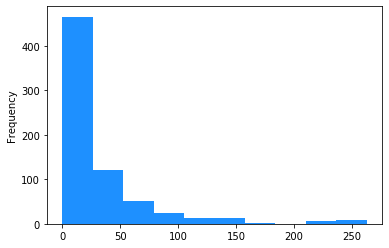

In [10]:
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist',color='dodgerblue');

In [21]:
farebins=[0,8,15,33,512]
farelabels=['low', 'medium', 'high','vhigh']
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
myresults = df['fare_groups'].value_counts().sort_index()
myresults

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

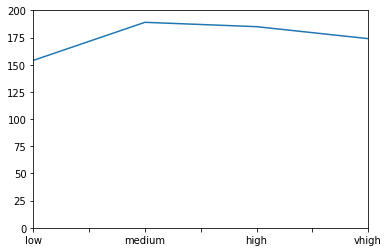

In [23]:
myresults.plot(ylim=(0,200));

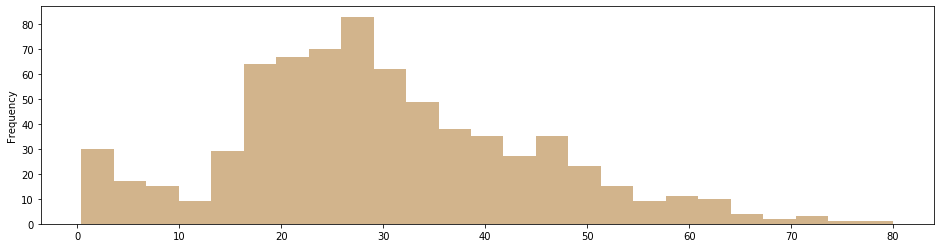

In [24]:
df['Age'].plot(kind='hist',bins=25,figsize=(16,4),color='tan');

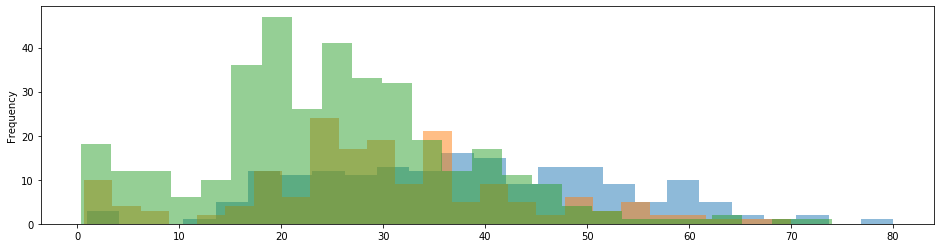

In [25]:
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25,figsize=(16,4),alpha=.5)
df[df['Pclass']==2]['Age'].plot(kind='hist',bins=25,figsize=(16,4),alpha=.5)
df[df['Pclass']==3]['Age'].plot(kind='hist',bins=25,figsize=(16,4),alpha=.5);

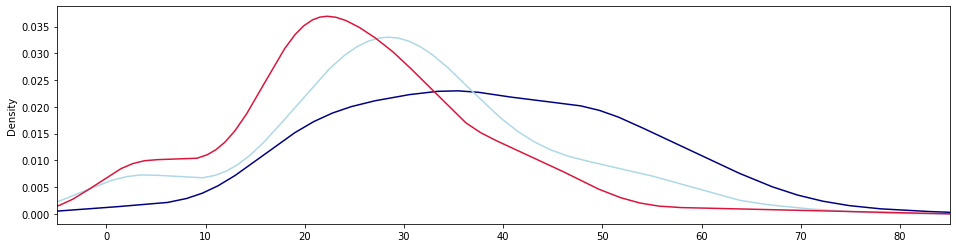

In [28]:
df[df['Pclass']==1]['Age'].plot(kind='density',xlim=(-5,85), figsize=(16,4),color='navy')
df[df['Pclass']==2]['Age'].plot(kind='density',xlim=(-5,85), figsize=(16,4),color='lightblue')
df[df['Pclass']==3]['Age'].plot(kind='density',xlim=(-5,85), figsize=(16,4),color='crimson');

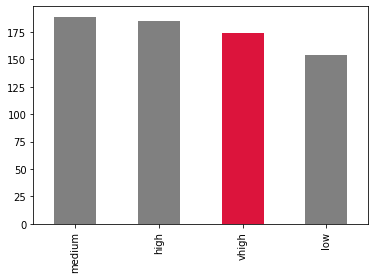

In [30]:
df['fare_groups'].value_counts().plot(kind='bar',color=['gray','gray','crimson','gray']);

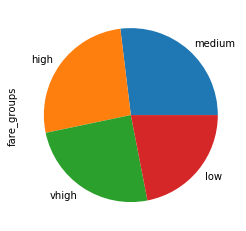

In [31]:
df['fare_groups'].value_counts().plot(kind='pie',figsize=(4,4));

In [32]:
cab_death = pd.crosstab(df['cabin_class'],df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


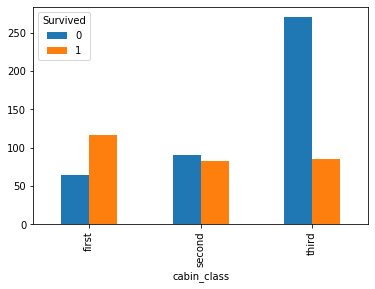

In [34]:
cab_death.plot(kind='bar');

In [36]:
cab_death1 = pd.crosstab(df['cabin_class'],df['Survived'],normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


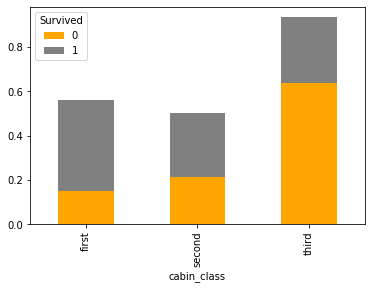

In [38]:
cab_death1.plot(kind='bar',stacked=True, color=['orange','gray']);

In [39]:
cab_death2 = pd.crosstab(df['cabin_class'],df['Survived'],normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


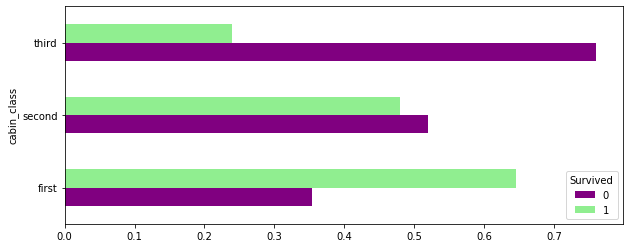

In [40]:
cab_death2.plot(kind='barh',color=['purple','lightgreen'],figsize=(10,4));

In [41]:
df['Age'].mean()

29.618011283497882

In [43]:
cab_age=df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

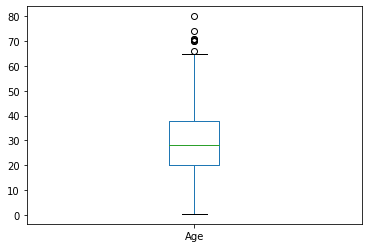

In [44]:
df['Age'].plot(kind='box');

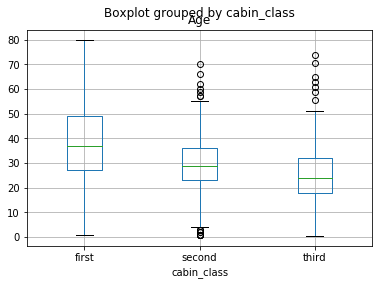

In [45]:
df.boxplot(column='Age', by='cabin_class');

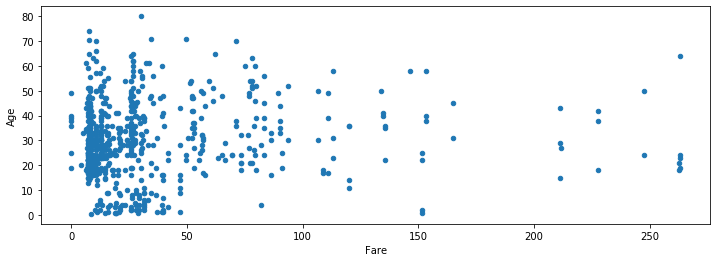

In [46]:
df.plot(kind='scatter',x='Fare',y='Age',figsize=(12,4));

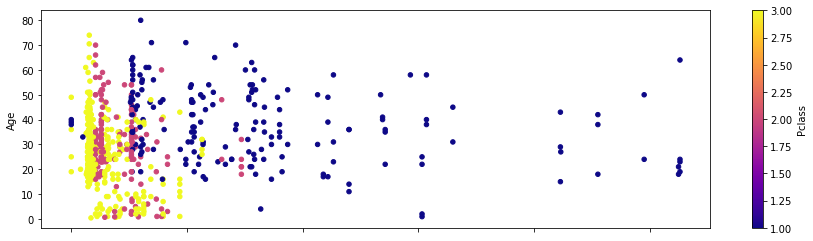

In [48]:
df.plot(kind='scatter',x='Fare',y='Age',c='Pclass',colormap='plasma',figsize=(15,4));

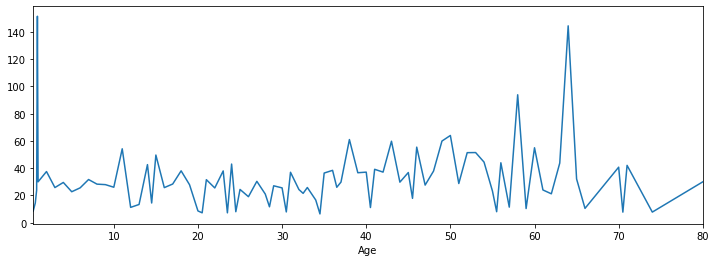

In [49]:
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

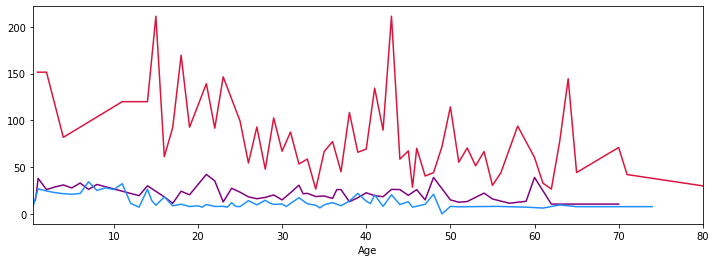

In [51]:
mycolors=['crimson','purple','dodgerblue']
for x in [1,2,3]:
  df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4),color=mycolors[x-1])

In [53]:
corr_matrix =df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


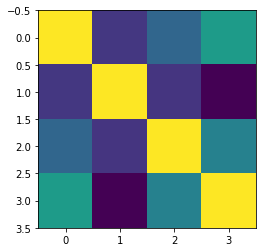

In [54]:
plt.imshow(corr_matrix);

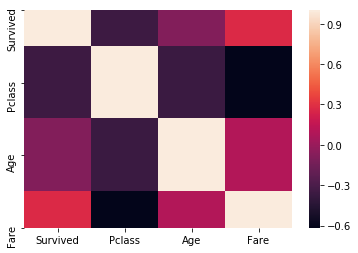

In [55]:
sns.heatmap(corr_matrix);

In [0]:
x = np.linspace(0,5,11)
y = x ** 2

In [57]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [58]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

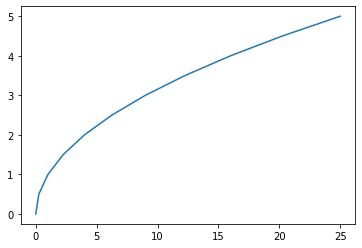

In [59]:
plt.plot(y,x);

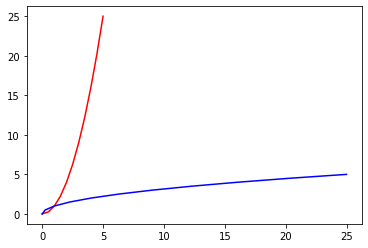

In [60]:
plt.plot(x,y,'r')
plt.plot(y,x,'b');

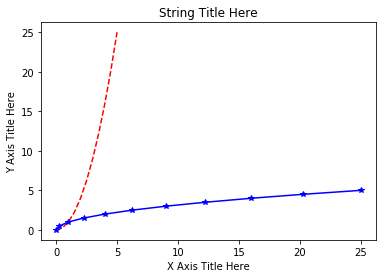

In [61]:
plt.plot(x,y,'r--')
plt.plot(y,x,'b*-')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here');

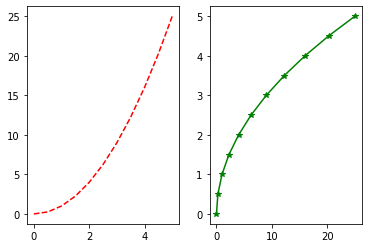

In [79]:
plt.subplot(1,2,1)
plt.plot(x,y,'r--')
plt.subplot(1,2,2)
plt.plot(y,x,'g*-');

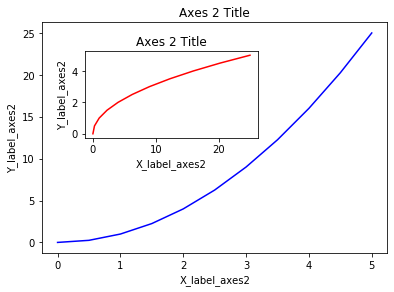

In [82]:
fig = plt.figure()

axes1 = fig.add_axes([.1,.1,.8,.8])
axes2 = fig.add_axes([.2,.5,.4,.3])

axes1.plot(x,y,'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

axes2.plot(y,x,'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

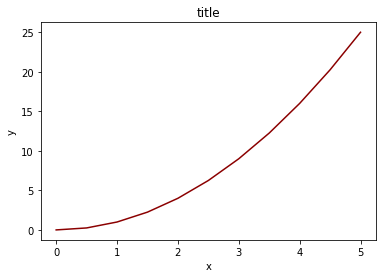

In [84]:
fig, axes= plt.subplots(nrows=1,ncols=1)

axes.plot(x,y,'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

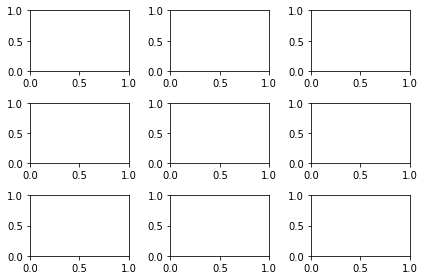

In [99]:
fig, axes = plt.subplots(nrows=3,ncols=3)

fig
plt.tight_layout()

In [100]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82ee4a45c0>,
      dtype=object)

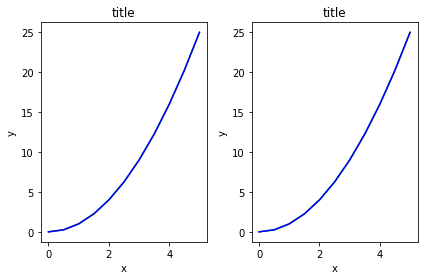

In [108]:
for ax in axes:
    ax.plot(x, y, 'b') 
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
  
fig

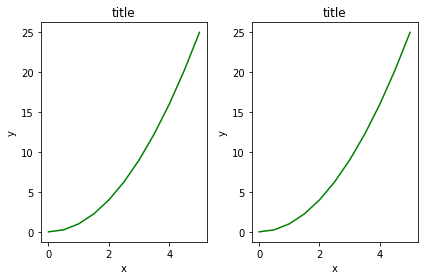

In [107]:
fig, axes = plt.subplots(nrows=1,ncols=2)

for ax in axes:
  ax.plot(x,y,'g')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('title')
  
fig
plt.tight_layout()

In [110]:
fig = plt.figure(figsize=(8,4),dpi=100)

<Figure size 800x400 with 0 Axes>

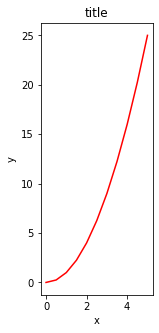

In [111]:
fig, axes= plt.subplots(figsize=(2,5))

axes.plot(x,y,'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [0]:
fig.savefig('filename.png')

In [0]:
fig.savefig('filename.jpg',dpi=200)

In [0]:
ax.set_title('title');

In [0]:
ax.set_xlabel('x')
ax.set_ylabel('y');

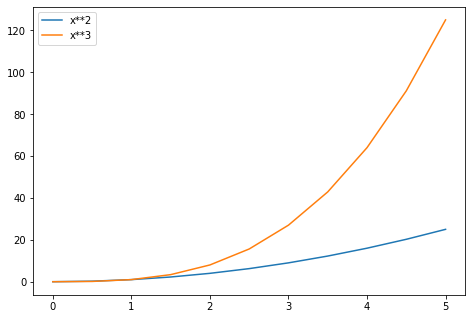

In [119]:
fig = plt.figure()

ax=fig.add_axes([0,0,1,1])
ax
ax.plot(x,x**2,label='x**2')
ax.plot(x,x**3,label='x**3')
ax.legend();

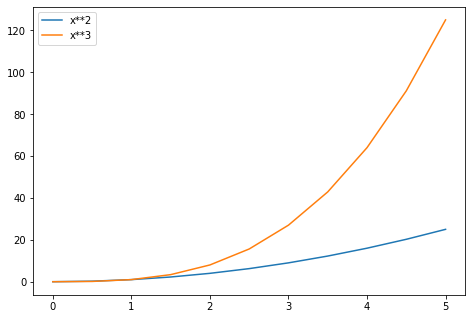

In [120]:
ax.legend(loc=1)
ax.legend(loc=2)
ax.legend(loc=3)
ax.legend(loc=4)

ax.legend()
fig

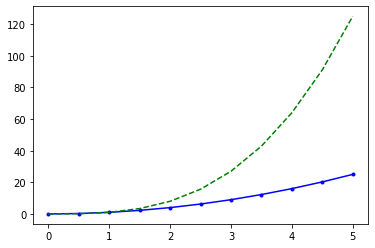

In [121]:
fig, ax=plt.subplots()
ax.plot(x,x**2,'b.-')
ax.plot(x,x**3,'g--');

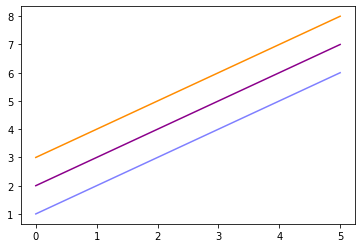

In [122]:
fig, ax = plt.subplots()

ax.plot(x,x+1,color='blue',alpha=.5)
ax.plot(x,x+2,color='#8B008B')
ax.plot(x,x+3,color='#FF8C00');

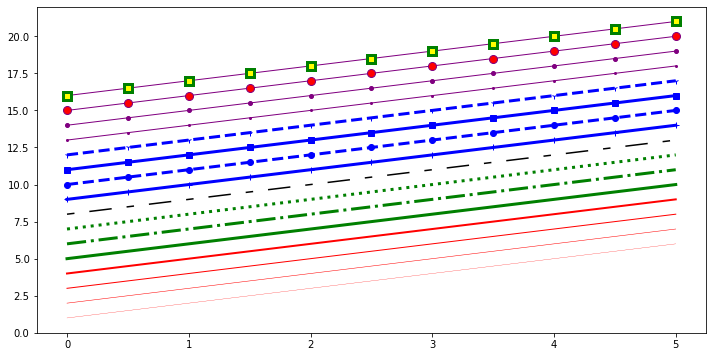

In [127]:
fig ,ax = plt.subplots(figsize=(12,6))

ax.plot(x,x+1,color='red',linewidth=.25)
ax.plot(x,x+2,color='red',linewidth=.5)
ax.plot(x,x+3,color='red',linewidth=1)
ax.plot(x,x+4,color='red',linewidth=2)

ax.plot(x,x+5,color='green',lw=3,linestyle='-')
ax.plot(x,x+6,color='green',lw=3,ls='-.')
ax.plot(x,x+7,color='green',lw=3,ls=':')

line, = ax.plot(x,x+8,color='black',lw=1.5)
line.set_dashes([5,10,15,10])

ax.plot(x,x+9,color='blue',lw=3,ls='-',marker='+')
ax.plot(x,x+10,color='blue',lw=3,ls='--',marker='o')
ax.plot(x,x+11,color='blue',lw=3,ls='-',marker='s')
ax.plot(x,x+12,color='blue',lw=3,ls='--',marker='1')

ax.plot(x,x+13,color='purple',lw=1,ls='-',marker='o',markersize=2)
ax.plot(x,x+14,color='purple',lw=1,ls='-',marker='o',markersize=4)
ax.plot(x,x+15,color='purple',lw=1,ls='-',marker='o',markersize=8, markerfacecolor='red')
ax.plot(x,x+16,color='purple',lw=1,ls='-',marker='s',markersize=8,
       markerfacecolor='yellow',markeredgewidth=3,markeredgecolor='green');

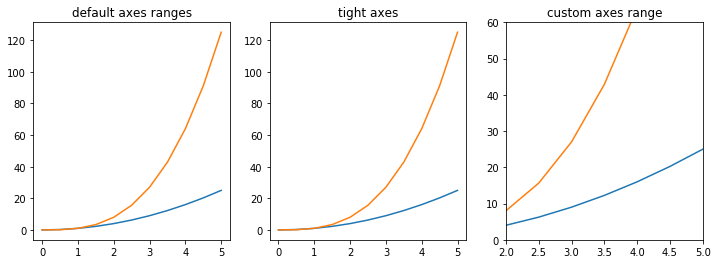

In [128]:
fig, axes = plt.subplots(1,3,figsize=(12,4))

axes[0].plot(x,x**2,x,x**3)
axes[0].set_title('default axes ranges')

axes[1].plot(x,x**2,x,x**3)
axes[1].axis('tight')
axes[1].set_title('tight axes')

axes[2].plot(x,x**2,x,x**3)
axes[2].set_ylim([0,60])
axes[2].set_xlim([2,5])
axes[2].set_title('custom axes range');

In [129]:
from IPython.display import display, Image

url='https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example=Image(url=url, width=400)

display(example)

In [130]:
print(plt.style.available[:5])
plt.style.use('fivethirtyeight')

['seaborn-pastel', 'dark_background', 'seaborn-dark-palette', 'seaborn-deep', 'ggplot']


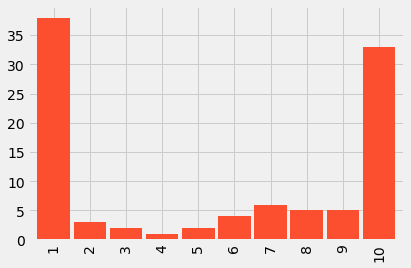

In [131]:
fake = pd.Series([38,3,2,1,2,4,6,5,5,33],
                index=range(1,11))

fake.plot.bar(color='C1',width=.9);

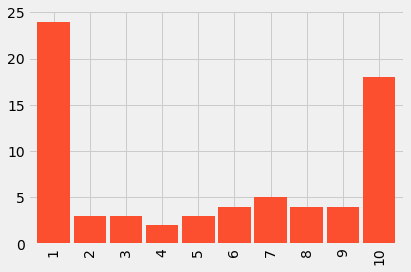

In [134]:
fake2 = pd.Series(
     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1',width=.9);

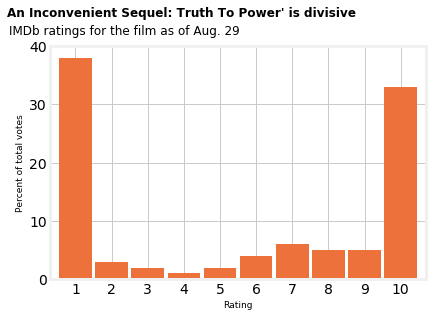

In [138]:
fig, ax = plt.subplots()
fig.patch.set(facecolor= 'white')

fake.plot.bar(width=.9,color='#ED713A')

ax.set(facecolor='white')

ax.set_title("An Inconvenient Sequel: Truth To Power' is divisive",
            fontsize=12,
            x=.35,
            y=1.1,
            fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug. 29',
        fontsize=12,
        x=-1.85,
        y=42);
ax.set_xlabel('Rating', fontsize=9)
ax.set_ylabel('Percent of total votes', fontsize=9)

ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [139]:
display(example)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
df.set_index('timestamp',inplace=True)

In [0]:
lastday = df['2017-08-29']

In [144]:
lastday_filtered=lastday[lastday['category']=='IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [145]:
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [146]:
pct_columns = ['1_pct','2_pct','3_pct','4_pct','5_pct',
              '6_pct','7_pct','8_pct','9_pct','10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [148]:
plot_data = final[pct_columns].T
plot_data.index=range(1,11)
plot_data.columns=['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


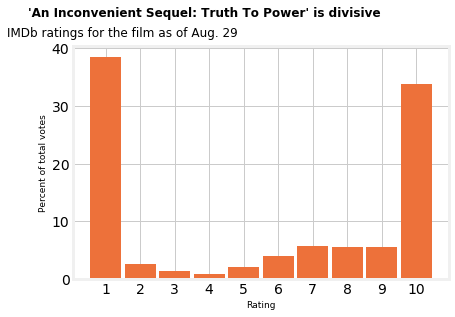

In [152]:
fig, ax = plt.subplots()

fig.patch.set(facecolor='white')

ax.bar(x=range(1,11),height=plot_data['percent'],width=.9,color='#ED713A')

ax.set(facecolor='white')

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
            fontsize=12,
            x=.35,
            y=1.1,
            fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12,
       x=-1.85,
       y=42)

ax.set_xlabel('Rating',fontsize=9)
ax.set_ylabel('Percent of total votes',fontsize=9)

ax.set_xticklabels(range(1,11),rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [160]:
url = 'https://fivethirtyeight.com/wp-content/uploads/2014/05/hickey-datalab-steak.png?w=575'
example = Image(url=url, width=400)
display(example)
# doesn't add up to 100% but i'm still gonna recreate it

In [0]:
plt.style.use('fivethirtyeight')

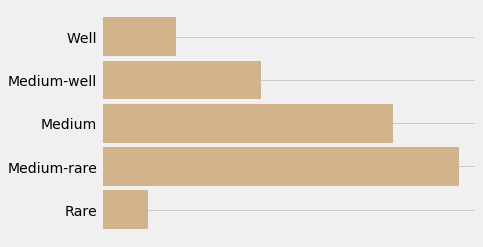

In [305]:
fake = pd.Series([5,38,31,17,8],
                index=['Rare','Medium-rare','Medium','Medium-well','Well'])


df = fake.plot.barh(color='tan', width=.9);
df.axes.get_xaxis().set_visible(False)

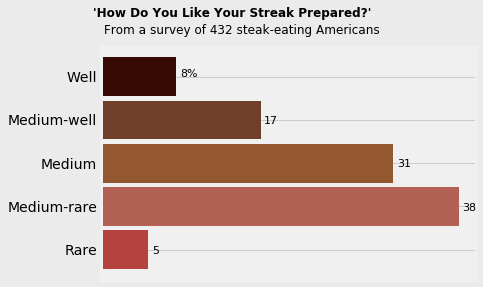

In [378]:
fig, ax = plt.subplots()

fig.patch.set(facecolor='#ebebeb')

mycolors=('#B64240','#B36154','#945831','#703F2B','#370B03')
fake.plot.barh(width=.9,color=mycolors)

ax.get_xaxis().set_visible(False)
ax.set_title("'How Do You Like Your Streak Prepared?'",
             fontsize=12,
             x=.35,
             y=1.1,
            fontweight='bold')
ax.text(s='From a survey of 432 steak-eating Americans',
       fontsize=12,
       x=.35,
       y=5);
ax.text(s='8%',
       fontsize=11,
       x=8.5,
       y=4)
ax.text(s='17',
       fontsize=11,
       x=17.3,
       y=2.9)
ax.text(s='31',
       fontsize=11,
       x=31.5,
       y=1.9)
ax.text(s='38',
       fontsize=11,
       x=38.4,
       y=.9)
ax.text(s='5',
       fontsize=11,
       x=5.5,
       y=-.1);

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here